In [221]:
import os
import sys
src_path = sys.path[0].replace("paper_working", "src")
# data_path = sys.path[0].replace("notebooks", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("paper_working", "output")

import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

rc_={
    "figure.dpi":300,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":False,
    "legend.frameon":False
}
plt.rcParams.update(rc_)

from utils.plot_utils import *
customize_plt() # customize plt configs, see plot_utils

In [222]:
mon_list=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Dec','Nov']
folder_path=r'D:\Codes\Energy_grid_new\output\experiments\thesis_value_of_information'
fn_list=[]
for i in mon_list:
    fn="6h-bat-"+i+"-disturbance-type.xlsx"
    fn_list.append(os.path.join(folder_path,fn))

In [223]:
def cal_relative(fn):
    df=pd.read_excel(fn,sheet_name="Sheet1",index_col=0)
    lower_bound=df[(df.strategy=="optimal")&(df.pred_model=="GT")]["OPEX"].values[0]
    upper_bound=df[(df.strategy=="MSC")&(df.pred_model=="GT")]["OPEX"].values[0]
    diff=upper_bound-lower_bound
    df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
    df["disturbance_MAPE"]=df["disturbance_scale"]*100
    return df

In [224]:
dfs=[]
necessaey_cols=["method","strategy","B_kWh","pred_model",
                "month_of_year","p_grid_max","price_dc",
                "disturbance_rule","disturbance_MAPE","p_grid_max_method",
                "OPEX","tou_cost","demand_charge","relative_OPEX"]
for fn in fn_list:
    df=pd.DataFrame(cal_relative(fn),columns=necessaey_cols)
    dfs.append(df)


In [225]:
for i in range(len(dfs)):
    df=dfs[i]
    rule_list=df["disturbance_rule"].unique()
    rule_list=rule_list[pd.notnull(rule_list)]
    for rule in rule_list:
        a=df[(df.disturbance_rule==rule)&(df.disturbance_MAPE==0.1)].copy()
        for k in ["OPEX","tou_cost","demand_charge","relative_OPEX"]:
            a[k]=[df[(df.strategy=="optimal")&(df.pred_model=="GT")][k].values[0]]*len(a)
        a["disturbance_MAPE"]=[0]*len(a)
        df=df._append(a).copy()
    dfs[i]=df.copy()

In [226]:
df_concated=pd.concat(dfs).drop_duplicates().reset_index(drop=True)
df_concated["disturbance_MAPE"] = df_concated["disturbance_MAPE"].apply(lambda x: round(x, 1))
df_by_method=df_concated.groupby(by='p_grid_max_method')

In [227]:
df_by_exe=df_by_method.get_group("by_execution").groupby(by="disturbance_rule")
df_uniform=df_by_exe.get_group("uniform")
df_uniform_neg=df_by_exe.get_group("uniform_neg")
df_uniform_pos=df_by_exe.get_group("uniform_pos")

In [228]:
mape=sorted(df_uniform["disturbance_MAPE"].unique())
y_uniform=list()
y_uniform_neg=list()
y_uniform_pos=list()
for m in mape:
    u=np.array(df_uniform[df_uniform.disturbance_MAPE==m]["relative_OPEX"].values)
    n=np.array(df_uniform_neg[df_uniform_neg.disturbance_MAPE==m]["relative_OPEX"].values)
    p=np.array(df_uniform_pos[df_uniform_pos.disturbance_MAPE==m]["relative_OPEX"].values)
    #y_uniform=np.append(y_uniform,a)
    y_uniform.append(u)
    y_uniform_pos.append(p)
    y_uniform_neg.append(n)

[Text(0.8, 0, ''),
 Text(1.0, 0, '0.0'),
 Text(1.2, 0, ''),
 Text(1.8, 0, ''),
 Text(2.0, 0, '0.1'),
 Text(2.2, 0, ''),
 Text(2.8, 0, ''),
 Text(3.0, 0, '0.5'),
 Text(3.2, 0, ''),
 Text(3.8, 0, ''),
 Text(4.0, 0, '1.0'),
 Text(4.2, 0, ''),
 Text(4.8, 0, ''),
 Text(5.0, 0, '2.0'),
 Text(5.2, 0, ''),
 Text(5.8, 0, ''),
 Text(6.0, 0, '3.0'),
 Text(6.2, 0, ''),
 Text(6.8, 0, ''),
 Text(7.0, 0, '4.0'),
 Text(7.2, 0, ''),
 Text(7.8, 0, ''),
 Text(8.0, 0, '5.0'),
 Text(8.2, 0, ''),
 Text(8.8, 0, ''),
 Text(9.0, 0, '6.0'),
 Text(9.2, 0, ''),
 Text(9.8, 0, ''),
 Text(10.0, 0, '7.0'),
 Text(10.2, 0, ''),
 Text(10.8, 0, ''),
 Text(11.0, 0, '8.0'),
 Text(11.2, 0, ''),
 Text(11.8, 0, ''),
 Text(12.0, 0, '9.0'),
 Text(12.2, 0, ''),
 Text(12.8, 0, ''),
 Text(13.0, 0, '10.0'),
 Text(13.2, 0, ''),
 Text(13.8, 0, ''),
 Text(14.0, 0, '15.0'),
 Text(14.2, 0, ''),
 Text(14.8, 0, ''),
 Text(15.0, 0, '20.0'),
 Text(15.2, 0, ''),
 Text(15.8, 0, ''),
 Text(16.0, 0, '25.0'),
 Text(16.2, 0, ''),
 Text(16.8, 0, '

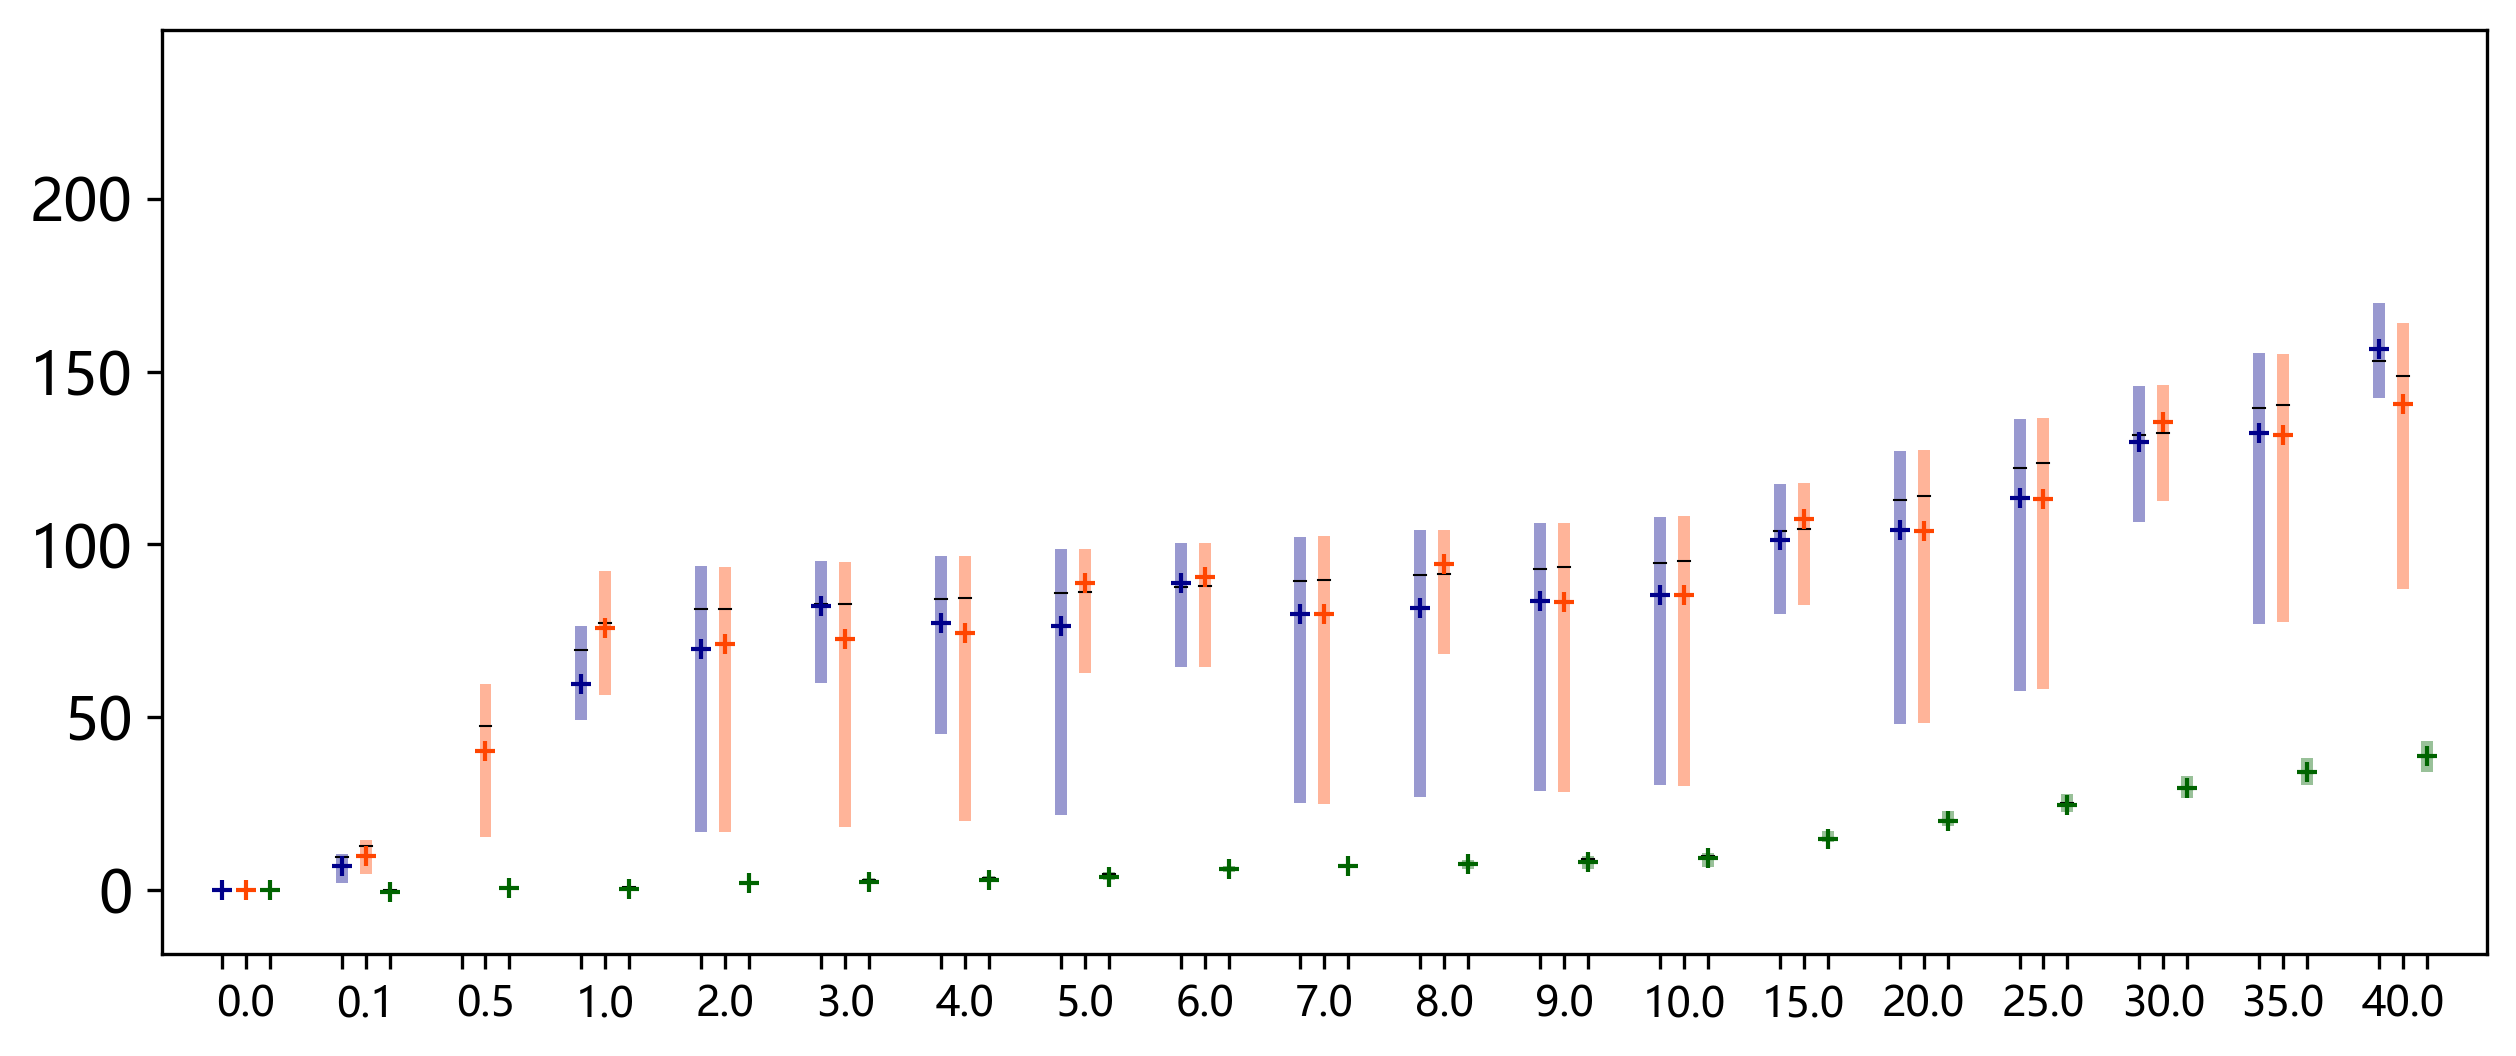

In [255]:
fig, ax=plt.subplots(figsize=(10,4))
positions1=np.array(range(1,len(mape)+1))-0.2
positions2=np.array(range(1,len(mape)+1))
positions3=np.array(range(1,len(mape)+1))+0.2
color_dic={
    'u':'darkblue',
    'u_neg':'orangered',
    'u_pos':'darkgreen'
}
pos_dic={
    'u':positions1,
    'u_neg':positions2,
    'u_pos':positions3
}
y_dic={
    'u':y_uniform,
    'u_neg':y_uniform_neg,
    'u_pos':y_uniform_pos
}
show_label_dic={
    'u':y_uniform,
    'u_neg':y_uniform_neg,
    'u_pos':y_uniform_pos
}
for key in color_dic.keys():
    ax.boxplot(y_dic[key],positions=pos_dic[key],patch_artist=True,showmeans=True,widths=0.1,        
            boxprops={"facecolor": color_dic[key],
                      "edgecolor": "w",
                      "linewidth": 0,
                      'alpha':0.4},
            medianprops={"color": "k", "linewidth": 0.5},
            meanprops={'marker':'+',
                       'markerfacecolor':color_dic[key],
                       'markeredgecolor':color_dic[key],
                       'markersize':5},
            sym="",showfliers=False, showcaps=False,
            whiskerprops={'color': 'w', 'linewidth': 1, 'linestyle': '--', 'alpha':0},
            )
    ax.set_xticks([])
    ax.set_xticklabels([])
#plt.xticks(labels=str(mape),ticks=positions2,fontsize=10)

labels=[]
positions=[]
for i in range(len(mape)):
    labels.append("")
    positions.append(positions1[i])
    labels.append(str(mape[i]))
    positions.append(positions2[i])
    labels.append("")
    positions.append(positions3[i])
ax.set_xticks(positions)
ax.set_xticklabels(labels,fontsize=10)


In [230]:
positions1

array([ 0.75,  1.5 ,  2.25,  3.  ,  3.75,  4.5 ,  5.25,  6.  ,  6.75,
        7.5 ,  8.25,  9.  ,  9.75, 10.5 , 11.25, 12.  , 12.75, 13.5 ,
       14.25])